# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

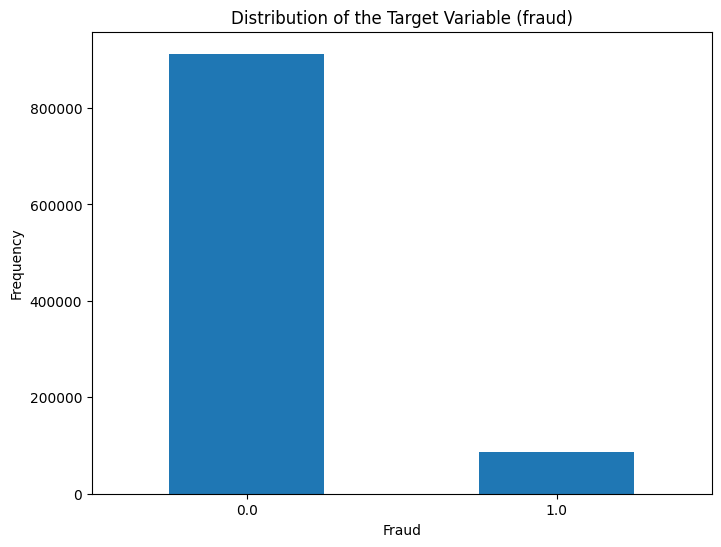

In [4]:
# Plotting the distribution of the target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
fraud['fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of the Target Variable (fraud)')
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

We are definitely dealing with an imbalanced dataset.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the target for the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182430
         1.0       0.89      0.59      0.71     17570

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.84    200000
weighted avg       0.96      0.96      0.95    200000

Confusion Matrix:
[[181128   1302]
 [  7181  10389]]


Precision:

* Class 0 (Non-fraudulent): 0.96
* Class 1 (Fraudulent): 0.89

Precision measures the proportion of true positive predictions to the total predicted positives. The high precision for class 0 indicates that the model is good at identifying non-fraudulent transactions, while the slightly lower precision for class 1 indicates that there are some false positives (non-fraudulent transactions predicted as fraudulent).

Recall:

* Class 0 (Non-fraudulent): 0.99
* Class 1 (Fraudulent): 0.59

Recall measures the proportion of true positive predictions to the actual positives. The high recall for class 0 shows that the model is very good at identifying non-fraudulent transactions, whereas the recall for class 1 is lower, indicating that the model misses a significant number of actual fraudulent transactions (false negatives).

F1-Score:

* Class 0 (Non-fraudulent): 0.98
* Class 1 (Fraudulent): 0.71

The F1-score is the harmonic mean of precision and recall. The higher F1-score for class 0 indicates that the model is very effective in classifying non-fraudulent transactions. The lower F1-score for class 1 reflects the challenges in accurately identifying fraudulent transactions.

Accuracy:

* Overall accuracy: 0.96

Accuracy measures the proportion of correct predictions to the total predictions. The high accuracy suggests that the model performs well overall, but given the class imbalance (many more non-fraudulent transactions than fraudulent ones), accuracy alone may not be the best measure of performance.

In [8]:
# Lets balance the dataset using RandomOverSampler

#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [11]:
# Applying RandomOverSampler to the training data
ros = RandomOverSampler(random_state=22)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
print("Resampled target variable distribution:")
print(y_train_resampled.value_counts())

# Fitting the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predicting the target for the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Resampled target variable distribution:
fraud
0.0    730167
1.0    730167
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182430
         1.0       0.58      0.95      0.72     17570

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion Matrix:
[[170271  12159]
 [   872  16698]]


If the primary interest is in correctly predicting fraudulent transactions (i.e., maximizing the detection of frauds), the oversampling model is better. It has a significantly higher recall (0.95 vs. 0.59) and correctly identifies more fraudulent transactions (16698 vs. 10389), despite having more false positives.

However, if precision (i.e., minimizing false positives) is more critical, the original model might be preferred due to its higher precision.

Given the typical goal in fraud detection is to catch as many fraudulent transactions as possible (high recall), the oversampling model would be considered better in this context.

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to the training data
rus = RandomUnderSampler(random_state=22)
X_train_resampled1, y_train_resampled1 = rus.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
print("Resampled target variable distribution:")
print(y_train_resampled1.value_counts())

# Fit the logistic regression model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_resampled1, y_train_resampled1)

# Predict the target for the test set
y_pred = model1.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Resampled target variable distribution:
fraud
0.0    69833
1.0    69833
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182430
         1.0       0.58      0.95      0.72     17570

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

Confusion Matrix:
[[170306  12124]
 [   863  16707]]


If the primary goal is to correctly identify as many fraudulent transactions as possible (maximizing recall), both the oversampling and undersampling models are better choices compared to the original model. Between the oversampling and undersampling models, the performance is very similar, with a slight edge to the undersampling model for having marginally fewer false positives.

In [15]:
# Now lets try smote!
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=22)
X_train_resampled2, y_train_resampled2 = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
print("Resampled target variable distribution:")
print(y_train_resampled2.value_counts())

# Fit the logistic regression model
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_resampled2, y_train_resampled2)

# Predict the target for the test set
y_pred = model3.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Resampled target variable distribution:
fraud
0.0    730167
1.0    730167
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182430
         1.0       0.58      0.95      0.72     17570

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

Confusion Matrix:
[[170378  12052]
 [   895  16675]]


If the primary goal is to correctly identify as many fraudulent transactions as possible (maximizing recall), the SMOTE, oversampling, and undersampling models are better choices compared to the original model. Among these, the SMOTE model performs comparably to the undersampling model but has slightly fewer false positives.

Given the context of fraud detection, where catching fraudulent transactions is the priority, the SMOTE model appears to be a strong choice, balancing high recall with a reasonable number of false positives.